<a href="https://colab.research.google.com/github/hniu-tamu/cotton_water_stress_remote_sensing/blob/main/Random_forest_feature_importance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np

In [ ]:
cd /content/drive/MyDrive/Cotton field features

/content/drive/MyDrive/Cotton field features


In [ ]:
# selected_col = [['CC220818', 'CC220902', 'CC220909', 'CC220920'],
#                 ['CH220818', 'CH220909', 'CH220920'],
#                 ['CV220818', 'CV220909', 'CV220920'],
#                 ['EG220818', 'EG220909', 'EG220909', 'EG220920']]

selected_col = ['CC220818', 'CH220818', 'CV220818', 'EG220818']
labels = pd.read_csv('labels_rgb.csv')
y_label = labels['class'].values
mean_data = pd.read_csv('mean_for 64 x 64 at 8_18_values.csv')
mean_data
selected_col2 = ['canopy cover', 'canopy height', 'canopy volume', 'exgreeness']

In [ ]:
for index, filename in enumerate(['Lubbock Attributes_canopy_cover.csv', 'Lubbock Attributes_canopy_height.csv',
                                  'Lubbock Attributes_canopy_volume.csv','Lubbock Attributes_exgreeness_index.csv']):
  data = pd.read_csv(filename)
  #data.set_index('Index', inplace=True)
  selected_cols = selected_col[index]
  selected_data = data[selected_cols]
  df = pd.concat([selected_data, pd.Series(y_label)], axis=1)
  df = df[df[0] != 0]
  mean_data[selected_col2[index]] = df[selected_col[index]].values

In [ ]:
mean_data['canopy cover'] = mean_data['canopy cover'] / 100
mean_data

red  green  blue  mask_size  y_label  canopy cover  canopy height  \
0     0.31   0.44  0.41       0.25        0      0.161751       0.220886   
1     0.31   0.43  0.41       0.25        0      0.148422       0.265625   
2     0.32   0.44  0.42       0.25        0      0.117178       0.240723   
3     0.31   0.43  0.41       0.26        0      0.129003       0.267603   
4     0.31   0.44  0.42       0.27        0      0.126156       0.281067   
...    ...    ...   ...        ...      ...           ...            ...   
5371  0.36   0.50  0.47       0.25        0      0.083847       0.324521   
5372  0.36   0.50  0.46       0.25        0      0.069302       0.307556   
5373  0.36   0.50  0.47       0.25        0      0.100716       0.310852   
5374  0.37   0.51  0.49       0.24        0      0.101170       0.303024   
5375  0.35   0.48  0.48       0.25        0      0.087338       0.283804   

      canopy volume  exgreeness  
0          0.017921    0.031872  
1          0.038597    0.024366  
2          0.026189    0.017040  
3          0.042243    0.020919  
4          0.039331    0.025646  
...             ...         ...  
5371       0.107593    0.007725  
5372       0.102202    0.001013  
5373       0.098316    0.009016  
5374       0.097084    0.007338  
5375       0.093415    0.005720  

[5376 rows x 9 columns]

In [ ]:
mean_data.describe().T

count      mean       std       min       25%       50%  \
red            5376.0  0.315465  0.038871  0.230000  0.290000  0.320000   
green          5376.0  0.457506  0.042742  0.350000  0.420000  0.460000   
blue           5376.0  0.405322  0.064719  0.260000  0.350000  0.410000   
mask_size      5376.0  0.305578  0.071500  0.070000  0.260000  0.300000   
y_label        5376.0  1.500000  1.118138  0.000000  0.750000  1.500000   
canopy cover   5376.0  0.235190  0.103015  0.014369  0.146207  0.236183   
canopy height  5376.0  0.345091  0.079420  0.034424  0.288522  0.341512   
canopy volume  5376.0  0.099633  0.054050 -0.037036  0.061866  0.097039   
exgreeness     5376.0  0.051796  0.032385 -0.018736  0.025031  0.046962   

                    75%       max  
red            0.340000  0.430000  
green          0.490000  0.580000  
blue           0.460000  0.610000  
mask_size      0.350000  0.570000  
y_label        2.250000  3.000000  
canopy cover   0.311004  0.560085  
canopy height  0.390137  0.632385  
canopy volume  0.127943  0.351088  
exgreeness     0.074931  0.172465

In [ ]:
mean_data.columns

Index(['red', 'green', 'blue', 'mask_size', 'y_label', 'canopy cover',
       'canopy height', 'canopy volume', 'exgreeness'],
      dtype='object')

In [ ]:
cotton_data = mean_data[['red', 'green', 'blue', 'mask_size', 'canopy cover',
       'canopy height', 'canopy volume', 'exgreeness']]

In [ ]:
cotton_data

red  green  blue  mask_size  canopy cover  canopy height  \
0     0.31   0.44  0.41       0.25      0.161751       0.220886   
1     0.31   0.43  0.41       0.25      0.148422       0.265625   
2     0.32   0.44  0.42       0.25      0.117178       0.240723   
3     0.31   0.43  0.41       0.26      0.129003       0.267603   
4     0.31   0.44  0.42       0.27      0.126156       0.281067   
...    ...    ...   ...        ...           ...            ...   
5371  0.36   0.50  0.47       0.25      0.083847       0.324521   
5372  0.36   0.50  0.46       0.25      0.069302       0.307556   
5373  0.36   0.50  0.47       0.25      0.100716       0.310852   
5374  0.37   0.51  0.49       0.24      0.101170       0.303024   
5375  0.35   0.48  0.48       0.25      0.087338       0.283804   

      canopy volume  exgreeness  
0          0.017921    0.031872  
1          0.038597    0.024366  
2          0.026189    0.017040  
3          0.042243    0.020919  
4          0.039331    0.025646  
...             ...         ...  
5371       0.107593    0.007725  
5372       0.102202    0.001013  
5373       0.098316    0.009016  
5374       0.097084    0.007338  
5375       0.093415    0.005720  

[5376 rows x 8 columns]

In [ ]:
cotton_data.describe().T

count      mean       std       min       25%       50%  \
red            5376.0  0.315465  0.038871  0.230000  0.290000  0.320000   
green          5376.0  0.457506  0.042742  0.350000  0.420000  0.460000   
blue           5376.0  0.405322  0.064719  0.260000  0.350000  0.410000   
mask_size      5376.0  0.305578  0.071500  0.070000  0.260000  0.300000   
canopy cover   5376.0  0.235190  0.103015  0.014369  0.146207  0.236183   
canopy height  5376.0  0.345091  0.079420  0.034424  0.288522  0.341512   
canopy volume  5376.0  0.099633  0.054050 -0.037036  0.061866  0.097039   
exgreeness     5376.0  0.051796  0.032385 -0.018736  0.025031  0.046962   

                    75%       max  
red            0.340000  0.430000  
green          0.490000  0.580000  
blue           0.460000  0.610000  
mask_size      0.350000  0.570000  
canopy cover   0.311004  0.560085  
canopy height  0.390137  0.632385  
canopy volume  0.127943  0.351088  
exgreeness     0.074931  0.172465

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

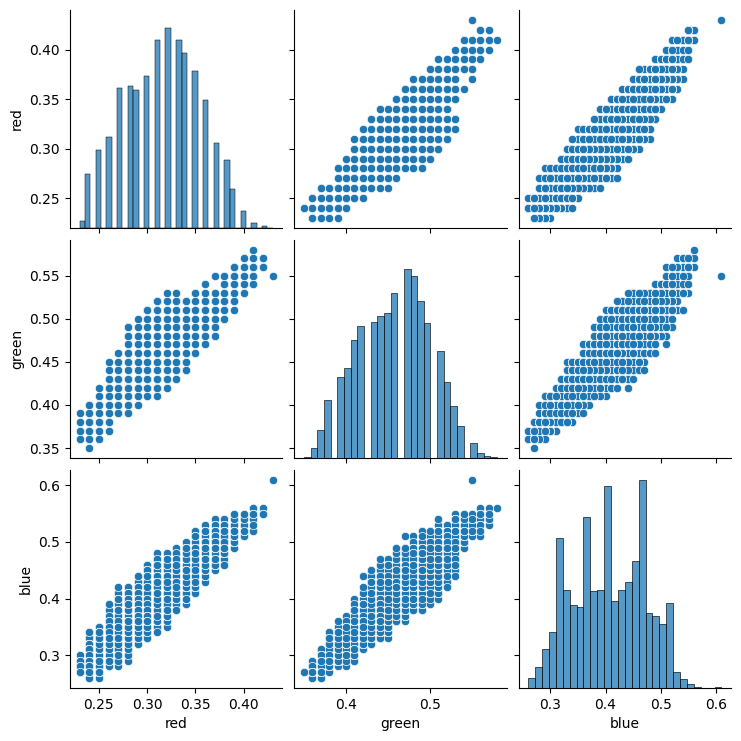

In [ ]:
sb.pairplot(cotton_data[['red', 'green', 'blue']])

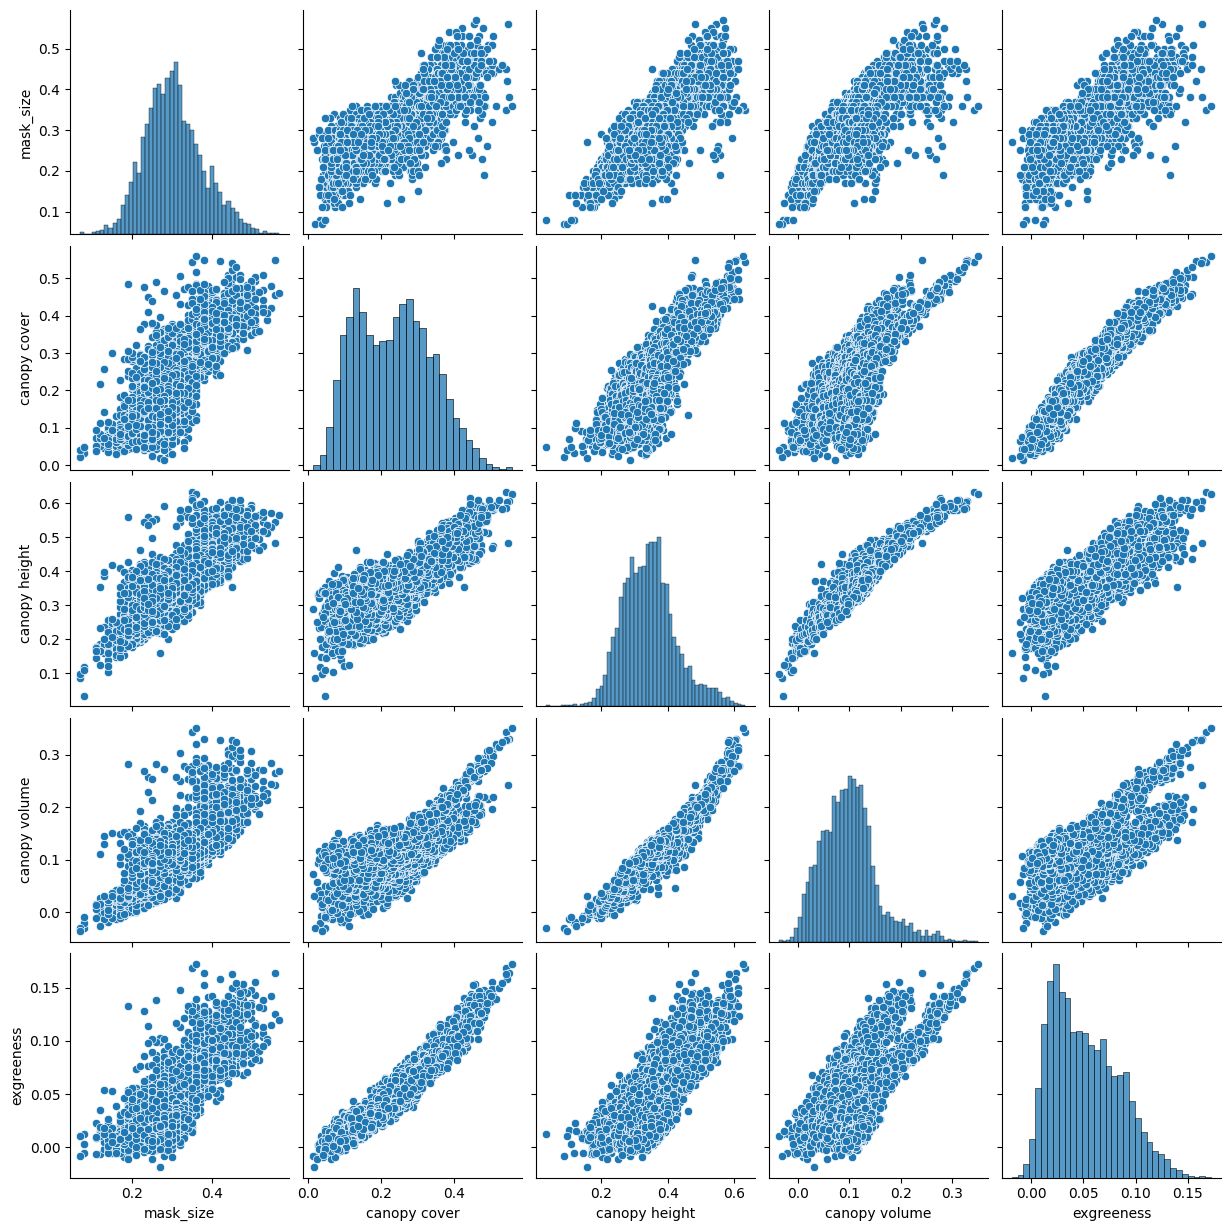

In [ ]:
sb.pairplot(cotton_data[['mask_size', 'canopy cover',
       'canopy height', 'canopy volume', 'exgreeness']])

In [ ]:
mean_data['y_label'].unique()

array([0, 2, 3, 1])

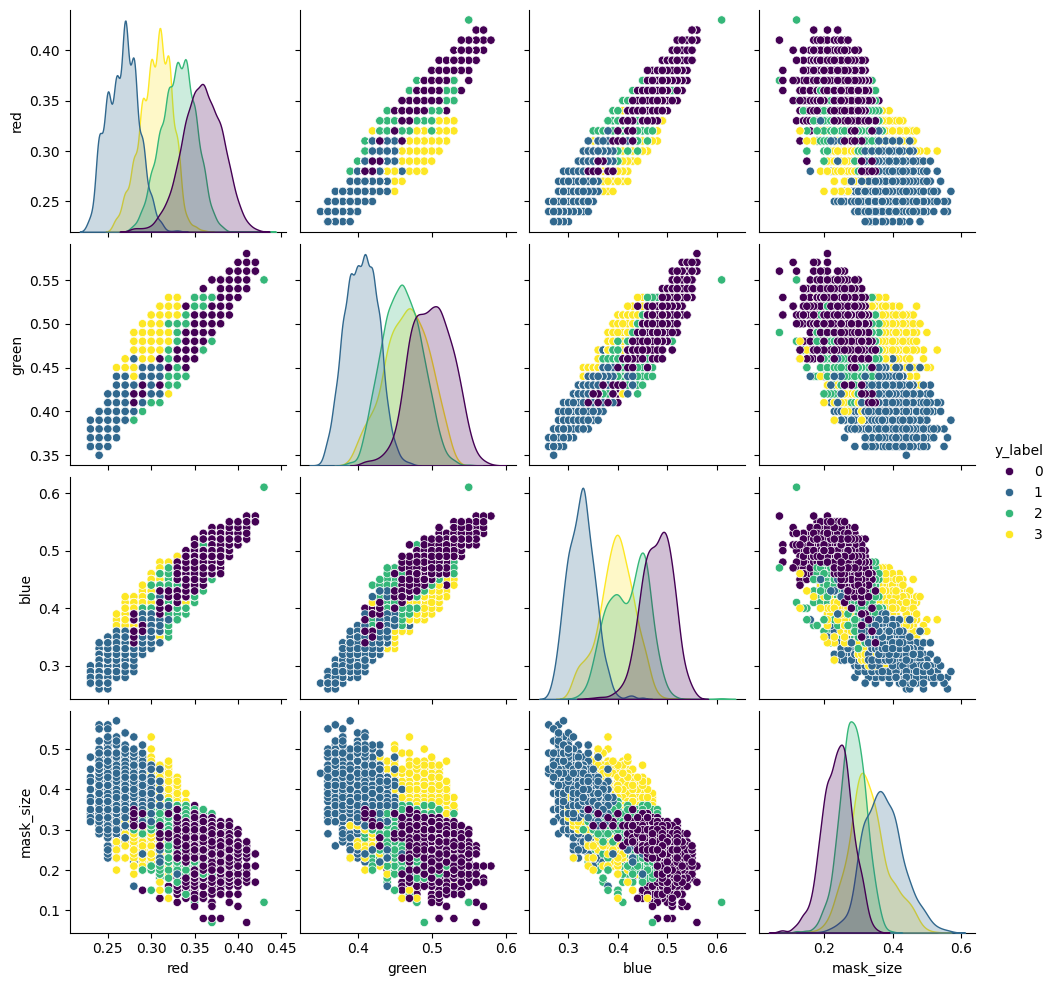

In [ ]:
sb.pairplot(mean_data[['red', 'green', 'blue', 'mask_size', 'y_label']], hue = 'y_label', palette='viridis')

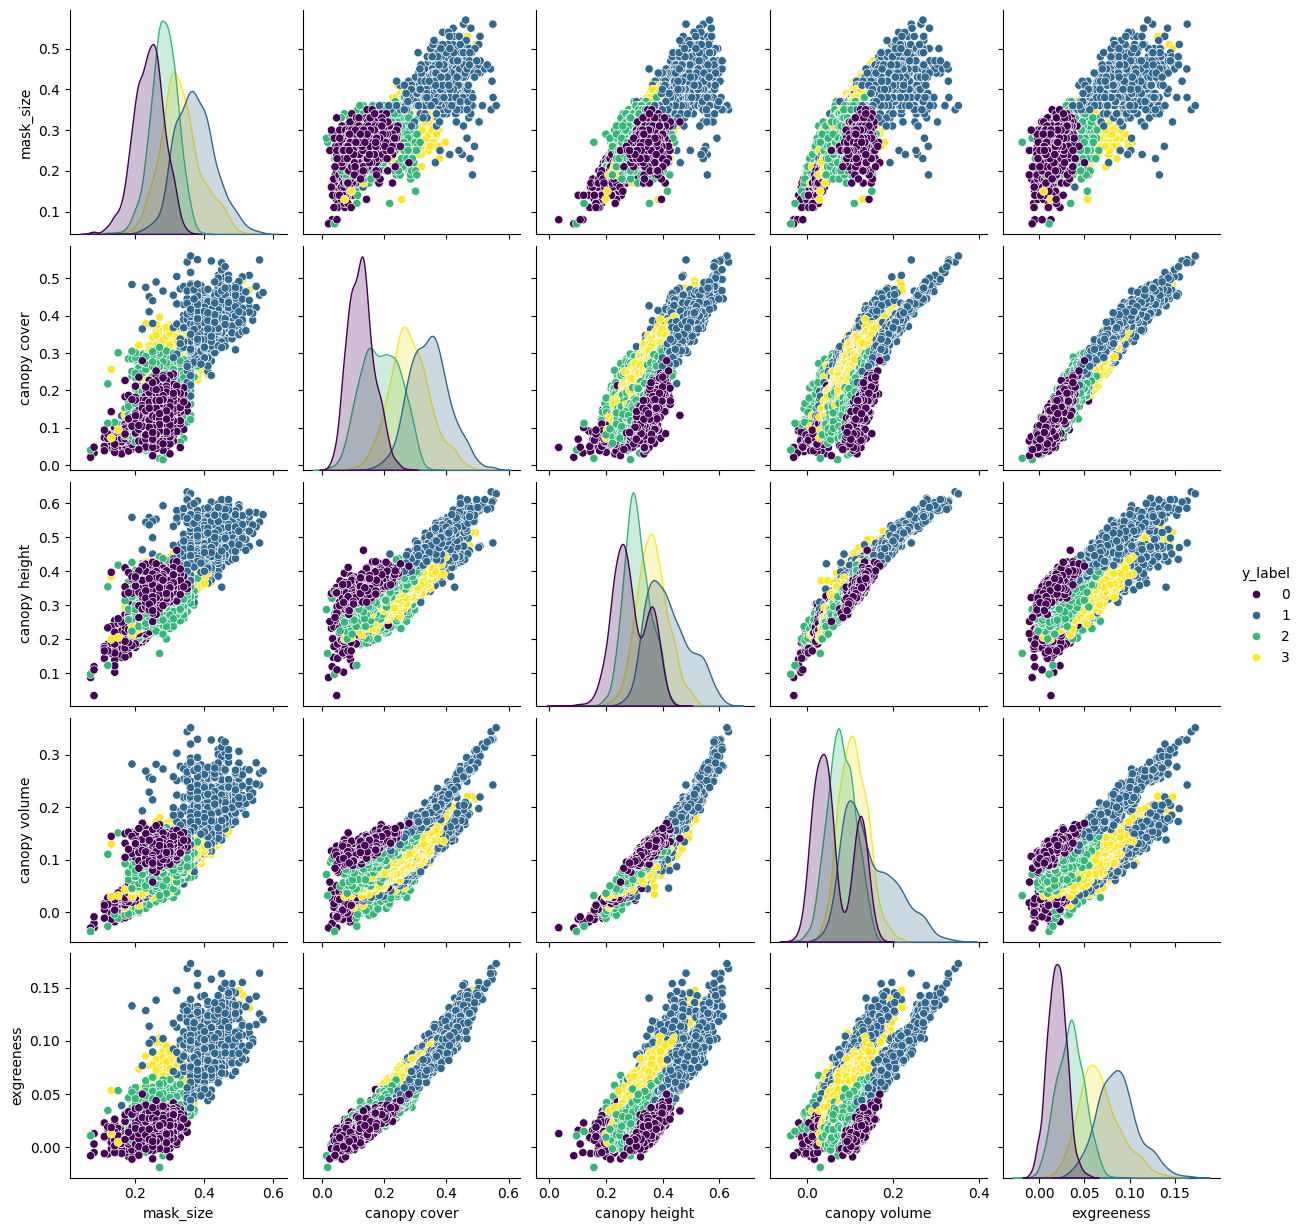

In [ ]:
sb.pairplot(mean_data[['mask_size', 'canopy cover', 'canopy height', 'canopy volume', 'exgreeness', 'y_label']], hue = 'y_label', palette='viridis')

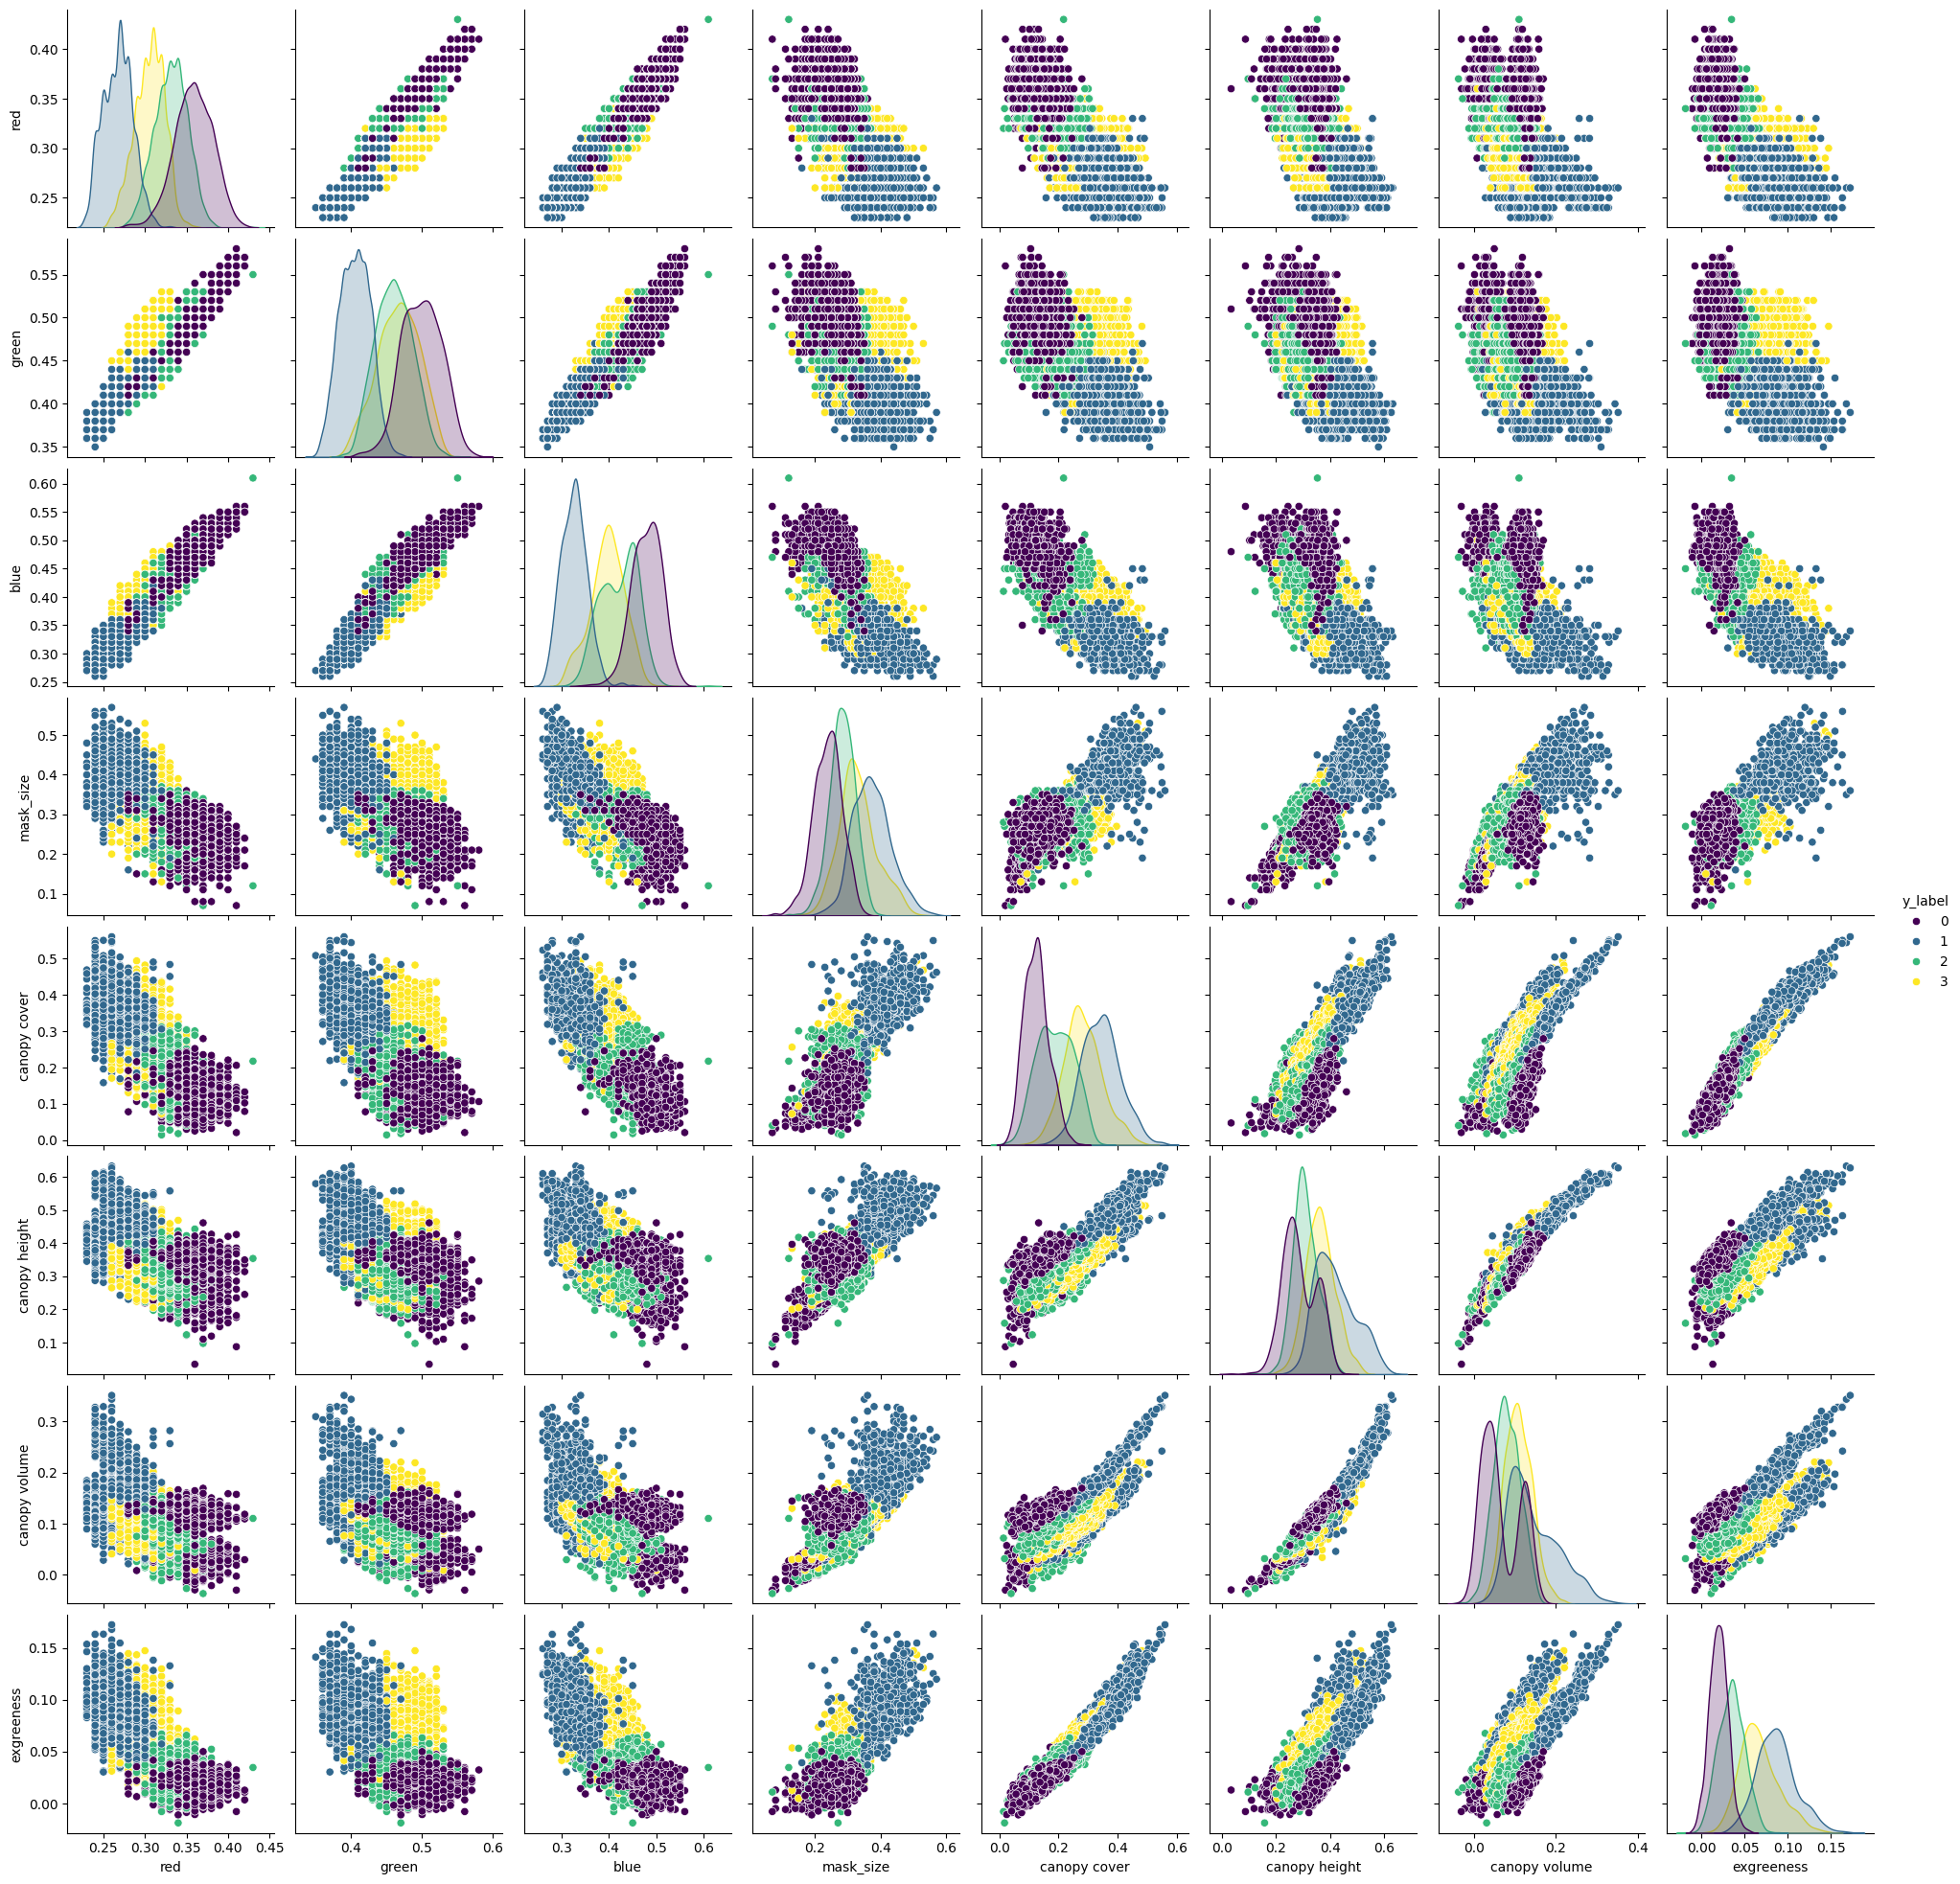

In [ ]:
sb.pairplot(mean_data, hue = 'y_label', palette='viridis')

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
X = mean_data[['red', 'green', 'blue', 'mask_size', 'canopy cover',
       'canopy height', 'canopy volume', 'exgreeness']]
y = mean_data['y_label']

# Random Forest Classifier with all features

The current iteration is 0
The current iteration is 1
The current iteration is 2
The current iteration is 3
The current iteration is 4
The current iteration is 5
The current iteration is 6
The current iteration is 7
The current iteration is 8
The current iteration is 9
The current iteration is 10
The current iteration is 11
The current iteration is 12
The current iteration is 13
The current iteration is 14
The current iteration is 15
The current iteration is 16
The current iteration is 17
The current iteration is 18
The current iteration is 19
The current iteration is 20
The current iteration is 21
The current iteration is 22
The current iteration is 23
The current iteration is 24
The current iteration is 25
The current iteration is 26
The current iteration is 27
The current iteration is 28
The current iteration is 29
The current iteration is 30
The current iteration is 31
The current iteration is 32
The current iteration is 33
The current iteration is 34
The current iteration is 35
Th

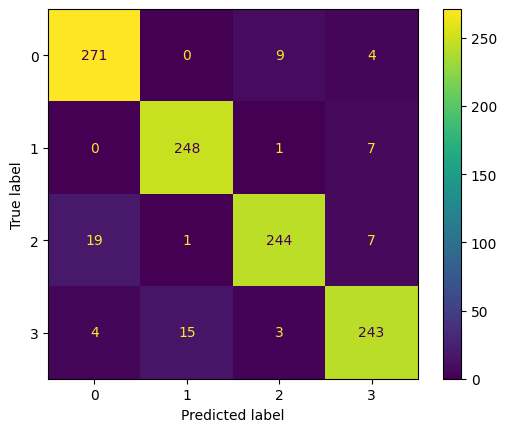

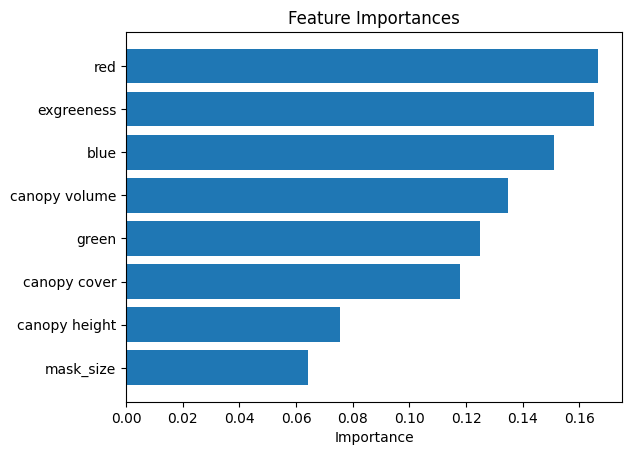

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
rfc = RandomForestClassifier()
total_importances = np.zeros(X.shape[1])
iters = 50
for i in range(iters):
    rfc.fit(X_train, y_train)
    total_importances += rfc.feature_importances_
    print(f"The current iteration is {i}")

# Evaluate the performance on the training and testing data
train_pred = rfc.predict(X_train)
test_pred = rfc.predict(X_test)
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)

disp = ConfusionMatrixDisplay.from_predictions(y_test, test_pred)


# precision recall
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, test_pred, labels=[0, 1, 2, 3])
from sklearn.metrics import classification_report
# 'rainfed', 'fully irrigated', 'percent deficit', 'time delay'
target_names = ['rainfed', 'fully irrigated', 'percent deficit', 'time delay']
print(classification_report(y_test, test_pred, target_names=target_names))


# Get the feature importances
importances = total_importances / iters
features = ['red', 'green', 'blue', 'mask_size', 'canopy cover',
       'canopy height', 'canopy volume', 'exgreeness']

# Print the importances for each feature
for feature, importance in zip(features, importances):
    print(feature, ':', importance)

# Sort the features by importance
indices = np.argsort(importances)
plt.figure()
# Plot the feature importances
plt.barh(range(len(features)), importances[indices], align='center')
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()